# **Binary brest cancer classification using neural networks**
*This machine learning model should can effectively distinguishes between **malignant** and **benign** breast cancer cases. <br>By utilizing the provided dataset containing attributes associated with breast cancer, the neural network learns to identify complex patterns that differentiate between this two classes. <br>The objective is to train the model to accurately predict whether a given instance of data represents malignant or benign cancer. Achieving high accuracy in this classification task is crucial for improving early detection and diagnosis accuracy in breast cancer cases, contributing to more effective medicamental treatments and/or surgical/radiologic interventions. <br>The trained model's success is measured by evaluating its performance on unseen test data using metrics like loss and accuracy, ensuring its reliability in real-world scenarios.*

In [3]:
# importing libraries and uploading of real women brest cancer data from CSV file

import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('cancer.csv')

**Diagnosis 1 means the tumor is malignant, diagnosis 0 means the tumor is benign.**

In [4]:
# Separates attributes from the target variable
# The column "diagnosis(1=m, 0=b)" is separated from the dataset
# x value stores the remaining columns of the dataset

x = dataset.drop(columns=["diagnosis(1=m, 0=b)"])

In [5]:
# y value stores the target variable "diagnosis(1=m, 0=b)"

y = dataset["diagnosis(1=m, 0=b)"]

In [6]:
# Splitting data into training and testing sets (80 % for training, 20 % for testing)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
# Model definiton - creating a sequential model using TensorFlow

model = tf.keras.models.Sequential()

In [8]:
# Adding 3 layers to the model (two input, one output) with a sigmoid activation function.

model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [9]:
# Model compilation with 'adam' optimizer (adaptive opimization algorithm) - it measures performance using the accuracy metric

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Model training on the training data for 1000 epochs

model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.6418
Epoch 2/1000
15/15 [==============================] - 0s 786us/step - loss: 0.5035 - accuracy: 0.7758
Epoch 3/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4407 - accuracy: 0.8747
Epoch 4/1000
15/15 [==============================] - 0s 809us/step - loss: 0.3869 - accuracy: 0.8989
Epoch 5/1000
15/15 [==============================] - 0s 786us/step - loss: 0.3495 - accuracy: 0.8945
Epoch 6/1000
15/15 [==============================] - 0s 786us/step - loss: 0.3243 - accuracy: 0.9011
Epoch 7/1000
15/15 [==============================] - 0s 747us/step - loss: 0.3154 - accuracy: 0.8989
Epoch 8/1000
15/15 [==============================] - 0s 794us/step - loss: 0.2894 - accuracy: 0.9099
Epoch 9/1000
15/15 [==============================] - 0s 793us/step - loss: 0.2722 - accuracy: 0.9187
Epoch 10/1000
15/15 [==============================] - 0s 643us/step - loss: 0.2885 - 

In [11]:
# Model evaluation on testing data and outputs the loss and accuracy

loss_all_data, accuracy_all_data = model.evaluate(x_test, y_test)
print(f"Loss_all_data = {loss_all_data:.4f} \nAccuracy_all_data: {accuracy_all_data:.4f}")

4/4 [==============================] - 0s 1ms/step - loss: 0.1232 - accuracy: 0.9474
Loss_all_data = 0.1232 
Accuracy_all_data: 0.9474


### Now let's try how the values ​​of loss and accuracy will change the model does not work with all available attributes, but only with selected columns.<br>I selected the columns radius_mean, smoothness_mean and concavity_mean. According to my (veterinary ;-) ) estimation, I would expect the best results to be achieved by a model that works with data for smoothness and concavity.  

In [12]:
columns = ["radius_mean", "smoothness_mean", "concavity_mean"]
results = []

for col_name in columns:
    # Obtaining the dates from the actual column
    x = dataset[[col_name]]
    x_train = np.array(x_train)
    x_test = np.array(x_test)

    # Model preparation for the actual column
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(256, input_shape=(x_train.shape[1],), activation='sigmoid'))
    model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Model training for the actual column
    model.fit(x_train, y_train, epochs=1000)

    # Model evaluation for the actual column
    loss, accuracy = model.evaluate(x_test, y_test)

    # Storing of results
    results.append((col_name, loss, accuracy))

# Printing results for all selected columns
for col_name, loss, accuracy in results:
    print("***" * 10)
    print(f"Loss_{col_name} = {loss:.4f} \nAccuracy_{col_name}: {accuracy:.4f}")





Epoch 1/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.6047 - accuracy: 0.6659
Epoch 2/1000
15/15 [==============================] - 0s 978us/step - loss: 0.3934 - accuracy: 0.9077
Epoch 3/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.2874 - accuracy: 0.8989
Epoch 4/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.2727 - accuracy: 0.8989
Epoch 5/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.2283 - accuracy: 0.9121
Epoch 6/1000
15/15 [==============================] - 0s 1000us/step - loss: 0.2422 - accuracy: 0.8901
Epoch 7/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.2176 - accuracy: 0.9121
Epoch 8/1000
15/15 [==============================] - 0s 1000us/step - loss: 0.2196 - accuracy: 0.9121
Epoch 9/1000
15/15 [==============================] - 0s 1000us/step - loss: 0.2048 - accuracy: 0.9209
Epoch 10/1000
15/15 [==============================] - 0s 929us/step - loss: 0.1995 - acc

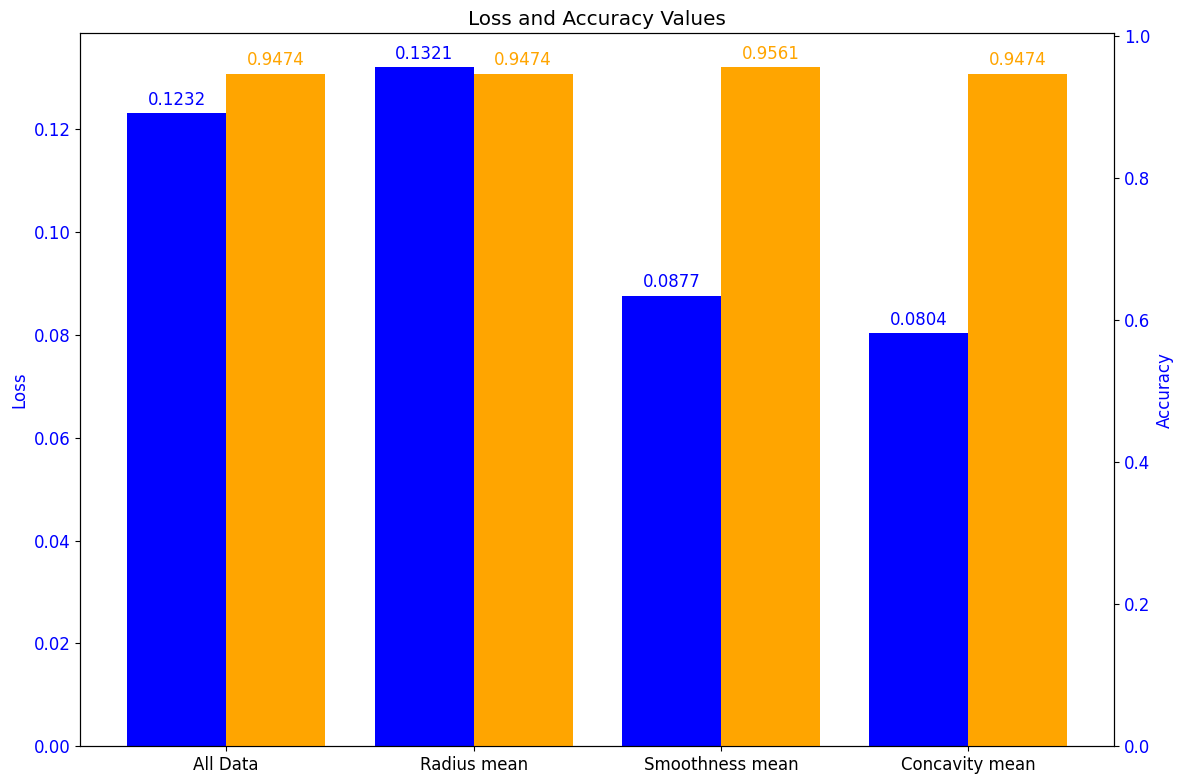

All Data loss = 0.1232 
All Data accuracy = 0.9474
Radius mean loss = 0.1321 
Radius mean accurecy 0.9474
Smoothness mean loss  = 0.0877 
Smoothness mean accurecy = 0.9561
Concavity mean loss = 0.0804 
Concavity mean accurecy = 0.9474


In [13]:
# Visualisation of the results

plt.rcParams.update({'font.size': 12})

# Preparing results from the 3 selected columns for visualisation
loss_values = []
accuracy_values = []

loss_radius_mean = None
accuracy_radius_mean = None
loss_smoothness_mean = None
accuracy_smoothness_mean = None
loss_concavity_mean = None
accuracy_concavity_mean = None

for col_name, loss, accuracy in results:
    loss_values.append(loss)
    accuracy_values.append(accuracy)

    if col_name == "radius_mean":
        loss_radius_mean = loss
        accuracy_radius_mean = accuracy
    elif col_name == "smoothness_mean":
        loss_smoothness_mean = loss
        accuracy_smoothness_mean = accuracy
    elif col_name == "concavity_mean":
        loss_concavity_mean = loss
        accuracy_concavity_mean = accuracy

# Adding values for "All Data"
loss_values.insert(0, loss_all_data)
accuracy_values.insert(0, accuracy_all_data)

# Graph creation
categories = ["All Data", "Radius mean", "Smoothness mean", "Concavity mean"]
fig, ax1 = plt.subplots(figsize=(12, 8))

bars1 = ax1.bar(np.arange(len(categories)) - 0.2, loss_values, width=0.4, align='center', label='Loss', color='blue')

ax1.set_ylabel('Loss', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

bars2 = ax2.bar(np.arange(len(categories)) + 0.2, accuracy_values, width=0.4, align='center', label='Accuracy', color='orange')

ax2.set_ylabel('Accuracy', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax1.annotate(f'{height1:.4f}', xy=(bar1.get_x() + bar1.get_width() / 2, height1),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', color='blue')
    ax2.annotate(f'{height2:.4f}', xy=(bar2.get_x() + bar2.get_width() / 2, height2),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', color='orange')

ax1.set_xticks(np.arange(len(categories)))
ax1.set_xticklabels(categories)
ax1.set_title('Loss and Accuracy Values')

plt.tight_layout()
plt.show()

# Recapitulaion of results
print(f"All Data loss = {loss_all_data:.4f} \nAll Data accuracy = {accuracy_all_data:.4f}")
print(f"Radius mean loss = {loss_radius_mean:.4f} \nRadius mean accurecy {accuracy_radius_mean:.4f}")
print(f"Smoothness mean loss  = {loss_smoothness_mean:.4f} \nSmoothness mean accurecy = {accuracy_smoothness_mean:.4f}")
print(f"Concavity mean loss = {loss_concavity_mean:.4f} \nConcavity mean accurecy = {accuracy_concavity_mean:.4f}")